## Instalação e importação de pacotes

In [125]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install category_encoders
# %pip install optuna

In [126]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import optuna

## Leitura de arquivos CSV

In [127]:
cars = pd.read_csv('data/cars.csv')

## Geração de uma amostra aleatória reprodutível de 25% do Dataset

In [128]:
# Definir a semente para reprodutibilidade
seed = 42

# Gerar uma amostra aleatória de 25%
sample_cars = cars.sample(frac=0.25, random_state=seed)

# Exibir a amostra
sample_cars

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,9-Speed Automatic,All-wheel Drive,Gasoline,20-29,Platinum White Pearl,Parchment,1.0,1.0,1.0,White Bear Subaru,4.7,4.4,56.0,1000.0,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,55-49,White,NaN,0.0,1.0,1.0,Auto Expo 95,NaN,NaN,0.0,2746.0,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,20-28,Ruby Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.8,4.8,192.0,150.0,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Ruby Red Metallic Tinted Clearcoat,Stone,0.0,0.0,1.0,The Bear Lot,NaN,4.5,14.0,600.0,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,9-Speed Automatic,Front-wheel Drive,Gasoline,20-26,Black,Jet Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.8,4.4,118.0,NaN,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263449,Ford,Mustang LX 5.0L Sport,1990,100514.0,5.0L V8 16V OHV,Automatic with Overdrive,Rear-wheel Drive,Gasoline,NaN,Deep Emerald Green Clearcoat Metallic,White,0.0,0.0,0.0,Paul Sevag Motors Inc.,5.0,4.7,5.0,2250.0,18500.0
640581,Subaru,Impreza Base,2020,44723.0,2.0L DOHC,CVT Lineartronic,NaN,NaN,NaN,Black,black,0.0,1.0,1.0,Doug Smith Subaru,NaN,4.7,34.0,NaN,20427.0
34845,BMW,330 i xDrive,2017,36795.0,2.0L,8-Speed Automatic,All-wheel Drive,Gasoline,23-33,Jet Black,Black,0.0,0.0,1.0,Deery Brothers of Dubuque,NaN,4.8,41.0,141.0,24999.0
443935,Kia,K5 EX,2021,10.0,1.6L I4 16V GDI DOHC Turbo,8-Speed Automatic,Front-wheel Drive,Gasoline,27-37,Passion Red,Black,0.0,1.0,1.0,All Star Kia of Baton Rouge,2.5,4.6,71.0,NaN,31858.0


## Análise Exploratória de Dados

In [129]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [130]:
cars.nunique()

manufacturer               30
model                   12187
year                      100
mileage                158751
engine                   6903
transmission             1313
drivetrain                 33
fuel_type                  36
mpg                       865
exterior_color           7681
interior_color           4679
accidents_or_damage         2
one_owner                   2
personal_use_only           2
seller_name             18254
seller_rating              41
driver_rating              35
driver_reviews_num        369
price_drop               6404
price                   63464
dtype: int64

In [131]:
cars.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


In [132]:
cars.isnull().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

### Preenchimento de Valores Vazios

In [133]:
# Função para converter o intervalo mpg para a média
def convert_mpg_to_numeric(mpg_str):
    if '-' in mpg_str:
        mpg_values = mpg_str.split('-')
        return (float(mpg_values[0]) + float(mpg_values[1])) / 2
    else:
        return float(mpg_str)

# Remover valores NaN antes de aplicar a conversão
cars['mpg'] = cars['mpg'].dropna().apply(convert_mpg_to_numeric)

In [134]:
# Preenchendo dados categóricos com "Desconhecido"
categorical_columns = [
    'manufacturer', 'model', 'engine', 'transmission', 'drivetrain',
    'fuel_type', 'exterior_color', 'interior_color', 'seller_name'
]
for col in categorical_columns:
    cars[col].fillna('Desconhecido', inplace=True)
    
# Dropando linhas com valores NaN nas colunas booleanas   
boolean_columns = ['accidents_or_damage', 'one_owner', 'personal_use_only']
for col in boolean_columns:
    cars.dropna(subset=[col], inplace=True)

# Preenchendo colunas numéricas contínuas com a mediana
numeric_columns_median = ['mileage']
for col in numeric_columns_median:
    cars[col].fillna(cars[col].median(), inplace=True)

# Preenchendo colunas numéricas contínuas com a média
numeric_columns_mean = [
    'seller_rating', 'driver_rating', 
    'driver_reviews_num', 'price_drop', 'price','mpg'
]
for col in numeric_columns_mean:
    cars[col].fillna(cars[col].mean(), inplace=True)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_1368\1588446485.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars[col].fillna('Desconhecido', inplace=True)
C:\Users\Pedro\AppData\Local\Temp\ipykernel_1368\1588446485.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [135]:
cars.isnull().sum()


manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64

In [136]:
cars.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,38.5,Black,Parchment,0.0,0.0,0.0,Iconic Coach,4.158844,4.4,12.0,300.000000,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Gray,Ebony,1.0,1.0,1.0,Kars Today,4.158844,4.4,12.0,996.812298,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.300000,4.4,12.0,500.000000,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Polished Metal Metallic,Desconhecido,0.0,1.0,1.0,Apple Tree Acura,4.158844,4.4,12.0,675.000000,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Desconhecido,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.700000,4.4,12.0,300.000000,14498.0


### Classificação das Variáveis

**Variáveis Numéricas:**
- year
- mileage
- seller_rating
- driver_rating
- driver_reviews_num
- price_drop
- price
- accidents_or_damage
- one_owner
- personal_use_only
- mpg

**Variáveis Categóricas:**
- manufacturer
- model
- engine
- transmission
- drivetrain
- fuel_type
- exterior_color
- interior_color
- seller_name


<Axes: >

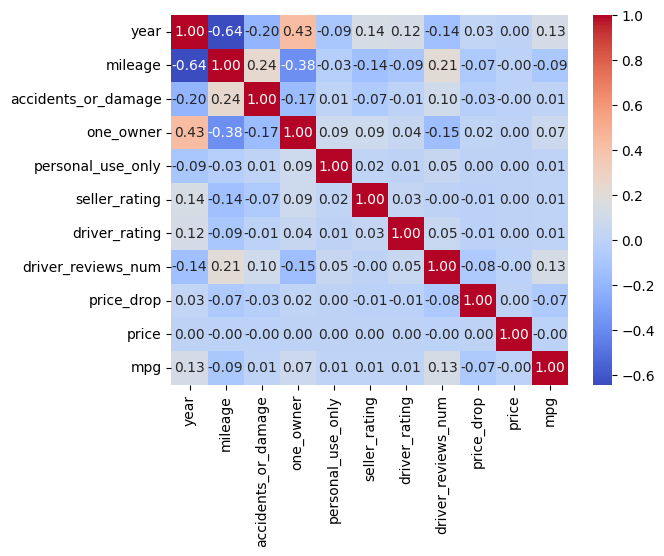

In [137]:
# Selecionando apenas as colunas numéricas
numerical_columns = [
    'year', 'mileage', 'accidents_or_damage', 'one_owner',
    'personal_use_only', 'seller_rating', 'driver_rating',
    'driver_reviews_num', 'price_drop', 'price', 'mpg'
]

# Calculando a correlação de Pearson
correlation_matrix = cars[numerical_columns].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

In [138]:
cars['price'].value_counts()


price
19995.0    3081
14995.0    2736
16995.0    2663
15995.0    2647
17995.0    2644
           ... 
55534.0       1
11336.0       1
58665.0       1
52127.0       1
51501.0       1
Name: count, Length: 62486, dtype: int64

### Detteção de outliers

In [139]:
# Calculando os valores mínimos, médios e máximos
min_values = cars[['price', 'price_drop']].min()
mean_values = cars[['price', 'price_drop']].mean()
max_values = cars[['price', 'price_drop']].max()  # Correção: armazenar os valores máximos

# Criando um DataFrame com os resultados
summary_df = pd.DataFrame({
    'Min': min_values,
    'Mean': mean_values,
    'Max': max_values
})

# Exibindo o DataFrame
print(summary_df)

              Min          Mean           Max
price         1.0  36485.494589  1.000000e+09
price_drop  100.0    996.812298  9.000000e+04


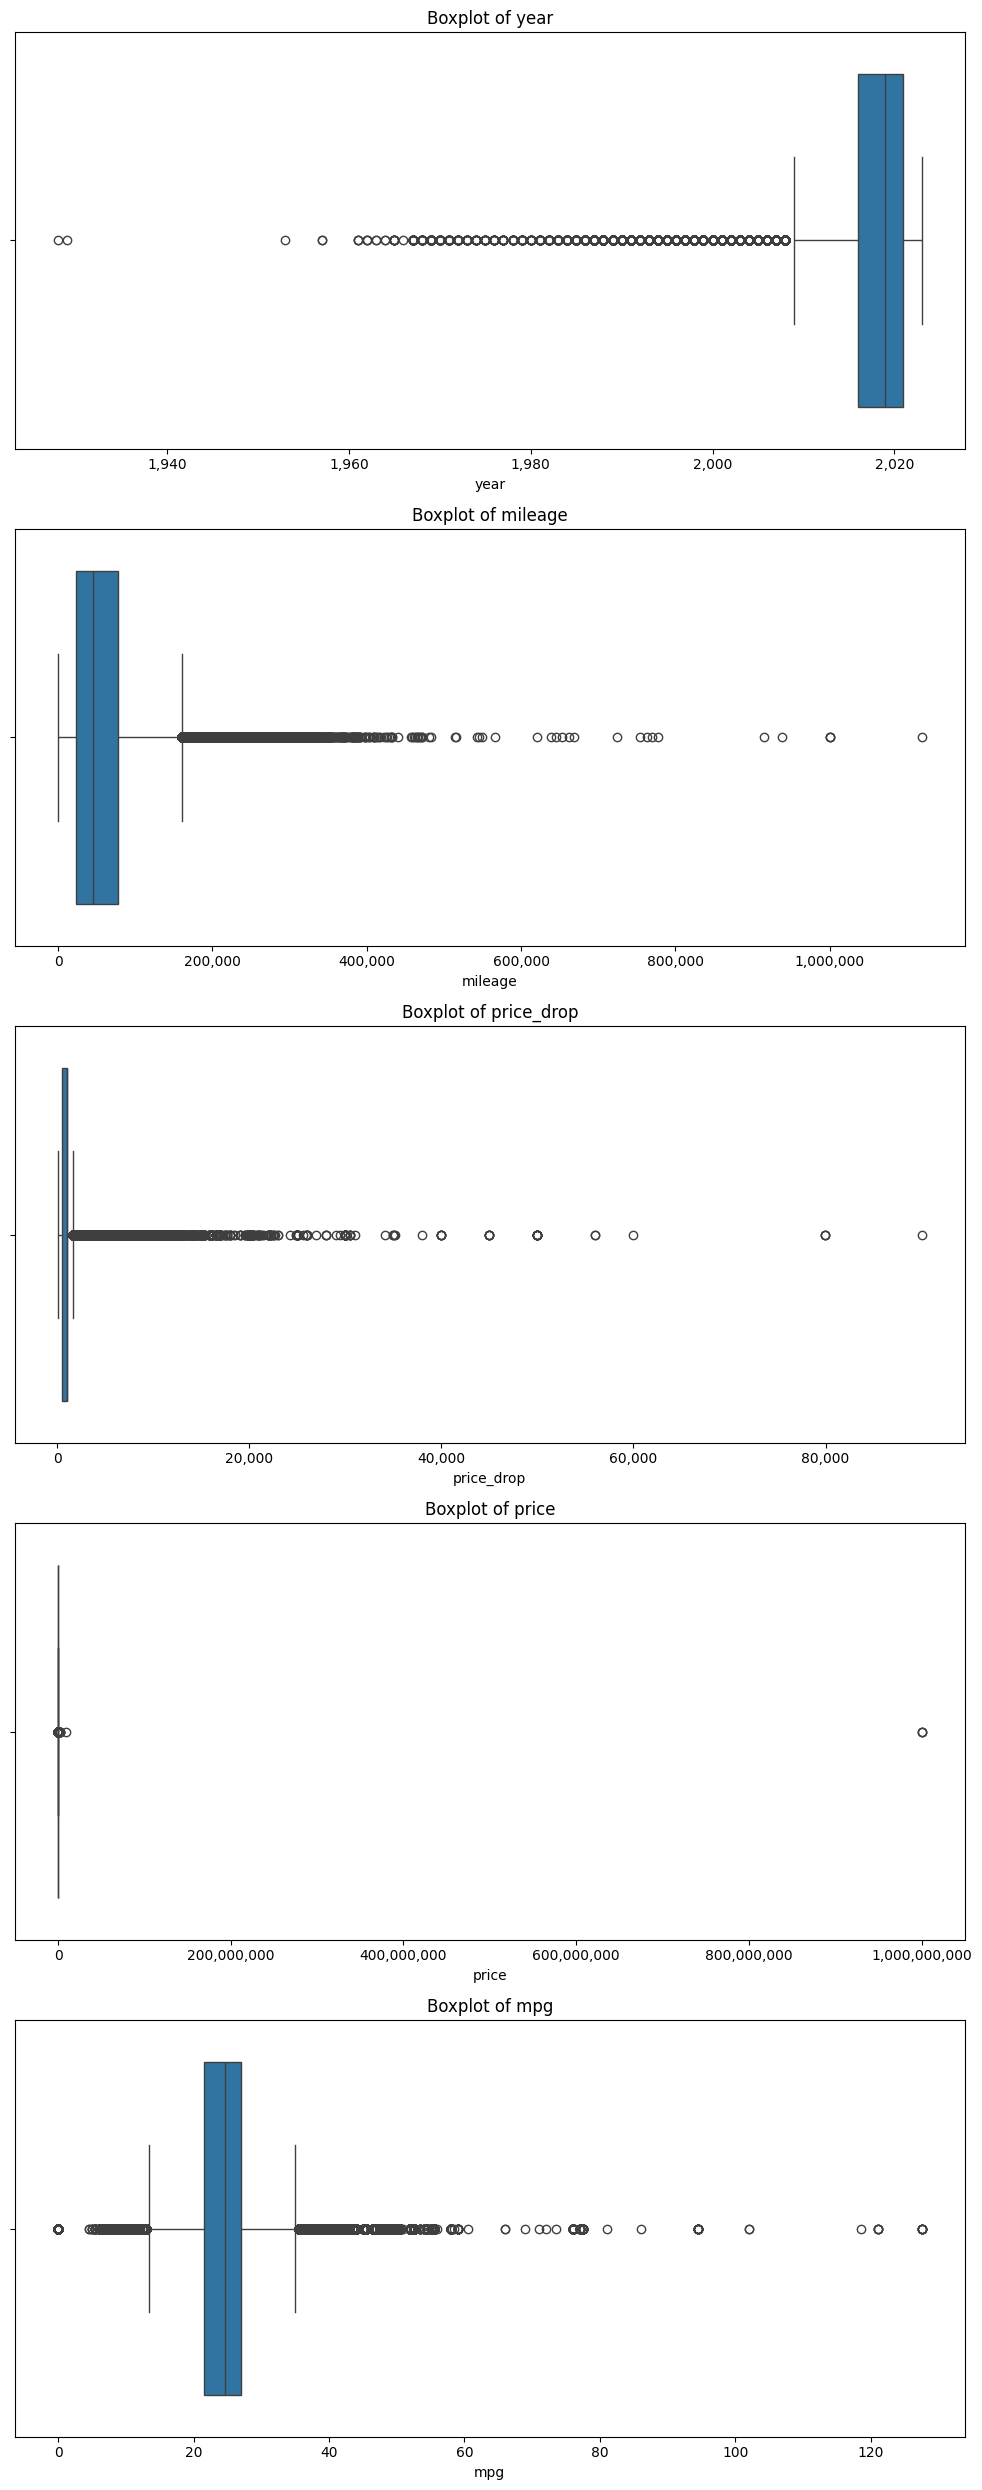

In [140]:
# Definição das colunas numéricas
numerical_columns = ['year', 'mileage', 'price_drop', 'price', 'mpg']

# Criando a figura com múltiplos boxplots
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=cars[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel(col)
    # Formatação do eixo X para não exibir notação científica
    axs[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

In [141]:
# Filtrando os dados para remover valores year
cars = cars[cars['year'] > 1950]

# Verificando os valores estatísticos após o filtro
print(cars['year'].describe())

count    730606.000000
mean       2017.970682
std           4.233533
min        1953.000000
25%        2016.000000
50%        2019.000000
75%        2021.000000
max        2023.000000
Name: year, dtype: float64


In [142]:
# Filtrando os dados para remover valores de price_drop 
cars = cars[cars['price_drop'] < 60000]

# Verificando os valores estatísticos após o filtro
print(cars['price_drop'].describe())

count    730601.000000
mean        996.282803
std         952.329375
min         100.000000
25%         539.000000
50%         996.812298
75%         996.812298
max       56000.000000
Name: price_drop, dtype: float64


In [143]:
# Filtrando os dados para remover valores de price
cars = cars[cars['price'] < 1000000]
print(cars['price'].describe())

count    730578.000000
mean      32328.831565
std       21882.092293
min           1.000000
25%       19639.000000
50%       27981.000000
75%       39052.250000
max      899975.000000
Name: price, dtype: float64


In [144]:
# Filtrando os dados para remover valores mileage
cars = cars[cars['mileage'] < 800000]

# Verificando os valores estatísticos após o filtro
print(cars['mileage'].describe())

count    730572.000000
mean      55747.607651
std       43072.382193
min           0.000000
25%       23542.750000
50%       45655.000000
75%       78136.000000
max      777698.000000
Name: mileage, dtype: float64


### Pearson e Boxplot após filtragem

<Axes: >

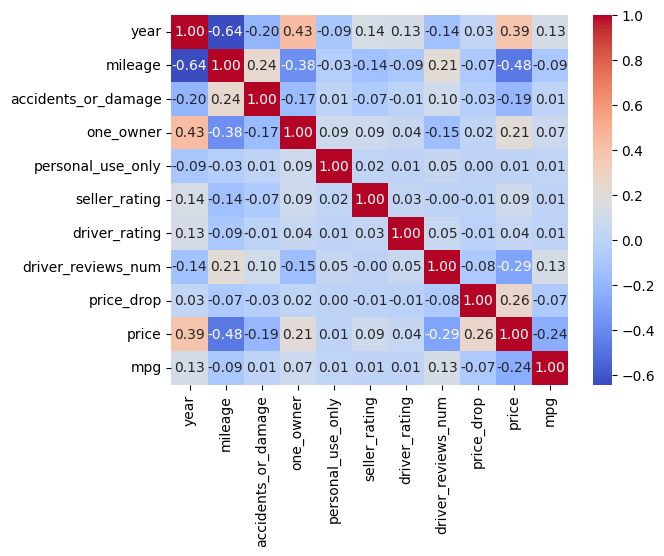

In [145]:
# Selecionando apenas as colunas numéricas
numerical_columns = [
    'year', 'mileage', 'accidents_or_damage', 'one_owner',
    'personal_use_only', 'seller_rating', 'driver_rating',
    'driver_reviews_num', 'price_drop', 'price', 'mpg'
]

# Calculando a correlação de Pearson
correlation_matrix = cars[numerical_columns].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

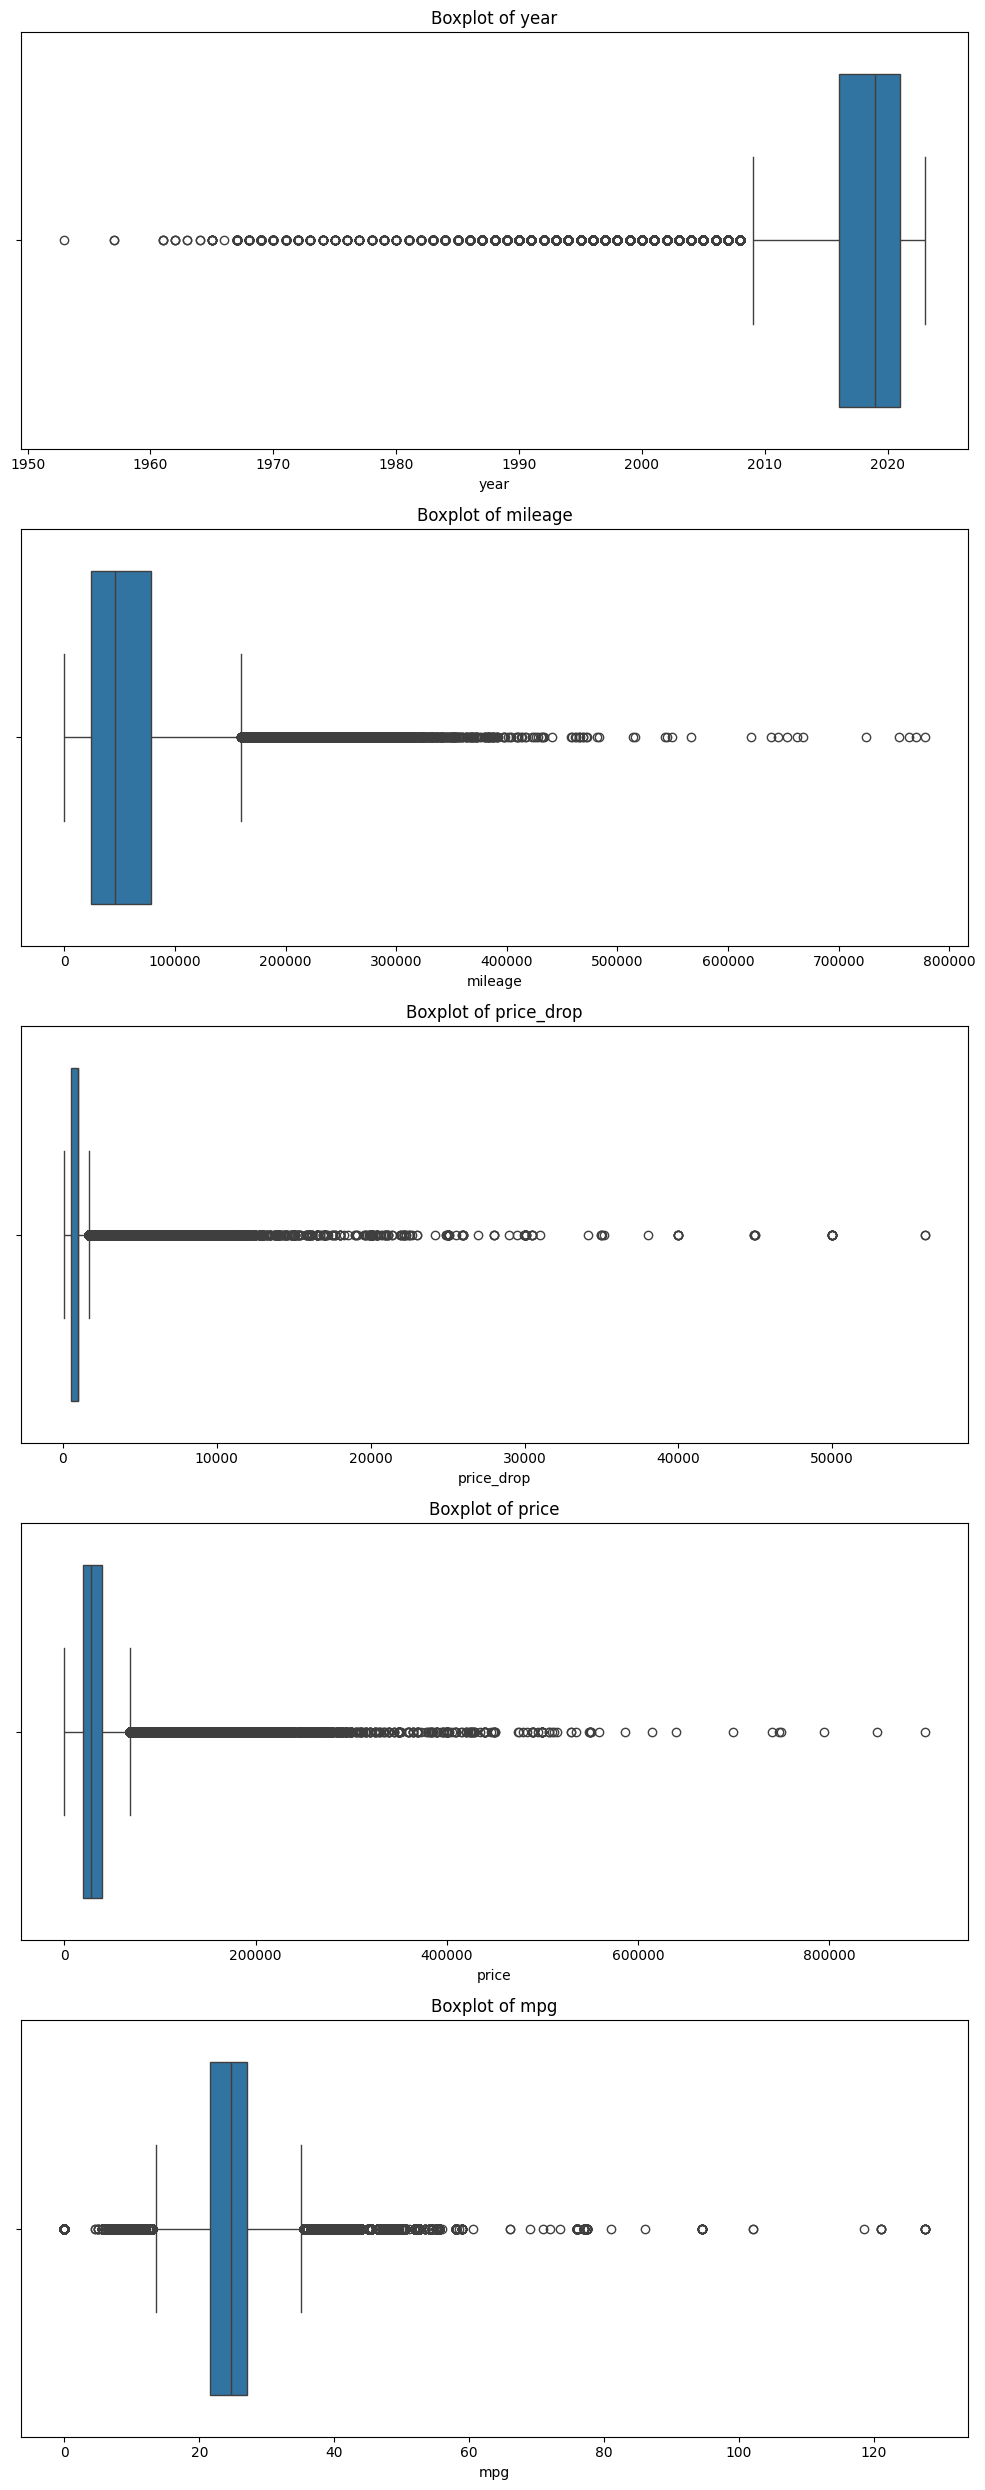

In [146]:
# Gerando boxplots para as variáveis numéricas
numerical_columns = ['year', 'mileage', 'price_drop', 'price', 'mpg']

fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

numerical_columns = ['year', 'mileage', 'price_drop', 'price', 'mpg']

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=cars[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Gráfico de Dispersão 

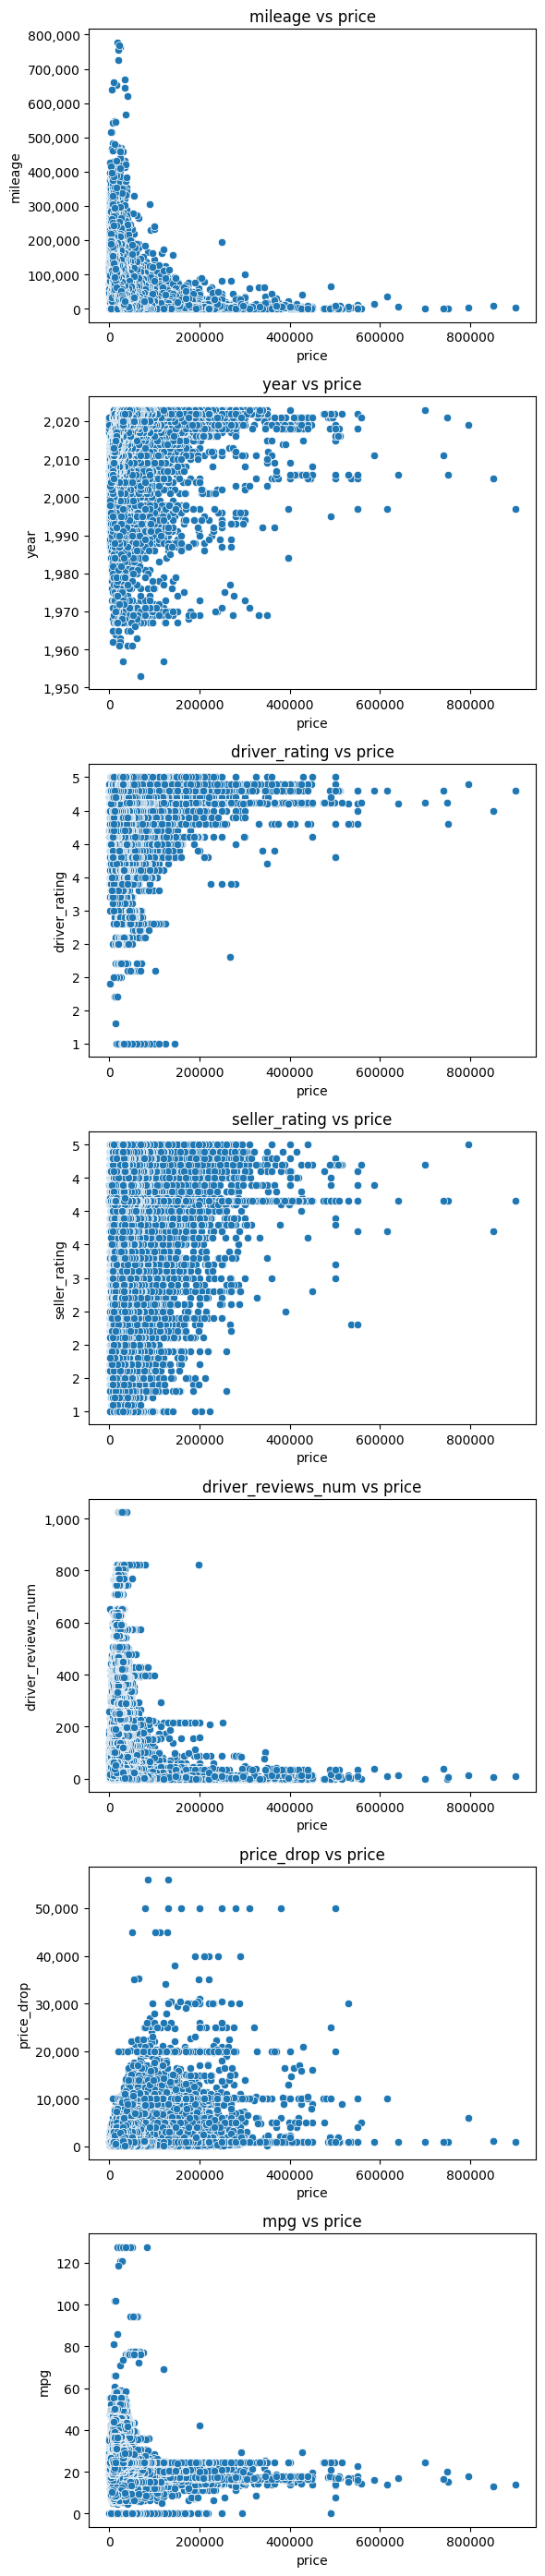

In [147]:
# Agora, gerando os gráficos com os dados filtrados
column_pairs = [
    ('price', 'mileage'), ('price', 'year'), 
    ('price', 'driver_rating'), ('price', 'seller_rating'), 
    ('price', 'driver_reviews_num'), ('price', 'price_drop'), 
    ('price', 'mpg')
]

n_plots = len(column_pairs)
fig, axs = plt.subplots(nrows=n_plots, ncols=1, figsize=(6, 4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=cars, ax=axs[i])
    axs[i].set_title(f'{y_col} vs {x_col}')
    
    # Formatação do eixo y para não exibir notação científica
    axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

In [148]:
cars.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,38.5,Black,Parchment,0.0,0.0,0.0,Iconic Coach,4.158844,4.4,12.0,300.000000,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Gray,Ebony,1.0,1.0,1.0,Kars Today,4.158844,4.4,12.0,996.812298,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.300000,4.4,12.0,500.000000,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Polished Metal Metallic,Desconhecido,0.0,1.0,1.0,Apple Tree Acura,4.158844,4.4,12.0,675.000000,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Desconhecido,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.700000,4.4,12.0,300.000000,14498.0


### Retirando colunas

In [149]:
drop_column = ['engine']
cars.drop(columns=drop_column, inplace=True)

In [150]:
cars.head()

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,Automatic,Front-wheel Drive,Gasoline,38.5,Black,Parchment,0.0,0.0,0.0,Iconic Coach,4.158844,4.4,12.0,300.000000,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Gray,Ebony,1.0,1.0,1.0,Kars Today,4.158844,4.4,12.0,996.812298,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.300000,4.4,12.0,500.000000,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Polished Metal Metallic,Desconhecido,0.0,1.0,1.0,Apple Tree Acura,4.158844,4.4,12.0,675.000000,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,Automatic CVT,Front-wheel Drive,Hybrid,38.5,Desconhecido,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.700000,4.4,12.0,300.000000,14498.0


In [151]:
# Lista de colunas categóricas
categorical_columns = [
    "manufacturer", "model", "transmission", "drivetrain",
    "fuel_type", "exterior_color", "interior_color", "seller_name"
]

# Separar colunas com muitas categorias (exemplo: mais de 10 categorias)
threshold = 10
columns_with_many_categories = [col for col in categorical_columns if cars[col].nunique() > threshold]
columns_with_few_categories = [col for col in categorical_columns if col not in columns_with_many_categories]

# Aplicar LabelEncoder para colunas com poucas categorias
label_encoders = {}
for col in columns_with_few_categories:
    le = LabelEncoder()
    cars[col] = le.fit_transform(cars[col])
    label_encoders[col] = le  # Armazenar o encoder para decodificação futura, se necessário

# Aplicar Target Encoding para colunas com muitas categorias
if columns_with_many_categories:
    target_encoder = ce.TargetEncoder(cols=columns_with_many_categories)
    cars[columns_with_many_categories] = target_encoder.fit_transform(cars[columns_with_many_categories], cars["price"])

# Resultado
print("DataFrame codificado:")
print(cars)

DataFrame codificado:
        manufacturer         model  year   mileage  transmission  \
0       29445.878477  28589.346047  2013   92945.0  36341.069980   
1       29445.878477  28589.346047  2013   47645.0  24117.202563   
2       29445.878477  28589.346047  2013   53422.0  24117.202563   
3       29445.878477  28589.346047  2013  117598.0  24117.202563   
4       29445.878477  28589.346047  2013  114865.0  24117.202563   
...              ...           ...   ...       ...           ...   
762085  35923.300054  15524.830725  2020   26781.0  36272.561356   
762086  35923.300054  34458.946226  2022   22877.0  36272.561356   
762088  35923.300054  15524.830725  2014   92000.0  24713.391828   
762089  35923.300054  25891.287267  2013  132000.0  24713.391828   
762090  35923.300054  13962.869703  2015  115592.0  24713.391828   

          drivetrain     fuel_type   mpg  exterior_color  interior_color  \
0       21473.308017  31243.610596  38.5    33493.019217    32698.384932   
1       2

## Divisão dos dados em treino e teste

In [152]:
# Calculando a correlação entre a coluna 'price' e as outras variáveis
correlation_matrix = cars.corr()

# Exibindo a correlação da coluna 'price'
print(correlation_matrix['price'].sort_values(ascending=False))

price                  1.000000
model                  0.859887
seller_name            0.608597
exterior_color         0.507832
manufacturer           0.450158
interior_color         0.439707
transmission           0.438165
year                   0.386303
drivetrain             0.362096
price_drop             0.261570
fuel_type              0.224674
one_owner              0.206017
seller_rating          0.091541
driver_rating          0.038476
personal_use_only      0.011141
accidents_or_damage   -0.191410
mpg                   -0.244630
driver_reviews_num    -0.285213
mileage               -0.475473
Name: price, dtype: float64


In [153]:
# Selecionando as variáveis independentes e a variável dependente
X = cars[['manufacturer', 'model', 'year', 'mileage', 'transmission', 'drivetrain', 
          'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'accidents_or_damage', 
          'one_owner', 'seller_name', 'driver_reviews_num', 'price_drop']]  # Variáveis independentes
y = cars['price']  # Variável dependente (target)

# Dividindo os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## Treinamento

### Random Forest

In [154]:
# Inicializando o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred_rf)  # Erro absoluto médio
r2_rf = r2_score(y_test, y_pred_rf)  # Coeficiente de determinação R²

# Exibindo os resultados
print(f"Erro absoluto médio (MAE) com Random Forest: {mae}")
print(f"Coeficiente de determinação (R²) com Random Forest: {r2_rf}")

Erro absoluto médio (MAE) com Random Forest: 3672.315582859853
Coeficiente de determinação (R²) com Random Forest: 0.8983756361377335


### Optuna

Resultados do oputna esta no arquivo txt

In [155]:
# Ativando logs para acompanhar o progresso das otimizações
optuna.logging.set_verbosity(optuna.logging.INFO)

# Função objetivo para o Optuna
def objective(trial):
    # Sugerindo os hiperparâmetros
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    
    # Criando o modelo com os hiperparâmetros sugeridos
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    # Usando validação cruzada para avaliar o modelo
    score = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error").mean()
    
    # O Optuna tenta maximizar a função objetivo, então retornamos o negativo do erro
    return -score

# Criando o estudo do Optuna
study = optuna.create_study(direction="minimize")  # Minimizar o erro
study.optimize(objective, n_trials=20)  # Limite de 20 tentativas

# Salvar os resultados do Optuna em um arquivo .txt
trials_df = study.trials_dataframe()  # Obter os dados das tentativas como um DataFrame
trials_df.to_csv("data/optuna_results.txt", sep="\t", index=False) 

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", study.best_params)

# Treinando o modelo final com os melhores parâmetros
best_params = study.best_params
rf_model_optimized = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42
)

# Treinando e avaliando o modelo otimizado
rf_model_optimized.fit(X_train, y_train)
y_pred_rf = rf_model_optimized.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Erro absoluto médio (MAE) com Random Forest otimizado: {mae}")
print(f"Coeficiente de determinação (R²) com Random Forest otimizado: {r2_rf}")

[I 2025-03-16 10:34:37,979] A new study created in memory with name: no-name-f10a7337-d20f-4b18-8060-8d93b837b63d
[I 2025-03-16 10:47:13,485] Trial 0 finished with value: 3141.411078595406 and parameters: {'n_estimators': 98, 'max_depth': 13, 'min_samples_split': 2}. Best is trial 0 with value: 3141.411078595406.
[I 2025-03-16 10:51:09,845] Trial 1 finished with value: 6541.538386521133 and parameters: {'n_estimators': 118, 'max_depth': 3, 'min_samples_split': 3}. Best is trial 0 with value: 3141.411078595406.
[I 2025-03-16 10:55:03,958] Trial 2 finished with value: 2753.1480073444163 and parameters: {'n_estimators': 25, 'max_depth': 17, 'min_samples_split': 5}. Best is trial 2 with value: 2753.1480073444163.
[I 2025-03-16 11:04:54,731] Trial 3 finished with value: 3664.528224755742 and parameters: {'n_estimators': 98, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 2 with value: 2753.1480073444163.
[I 2025-03-16 11:07:42,988] Trial 4 finished with value: 5651.774777552023 and 

Melhores hiperparâmetros: {'n_estimators': 137, 'max_depth': 20, 'min_samples_split': 8}
Erro absoluto médio (MAE) com Random Forest otimizado: 2487.2085747566493
Coeficiente de determinação (R²) com Random Forest otimizado: 0.9367047298816173


### Random Forest Parâmetros do Optuna

In [158]:
# Inicializando o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=137, max_depth=20, min_samples_split=8, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred_rf)  # Erro absoluto médio
r2_rf = r2_score(y_test, y_pred_rf)  # Coeficiente de determinação R²

# Exibindo os resultados
print(f"Erro absoluto médio (MAE) com Random Forest: {mae}")
print(f"Coeficiente de determinação (R²) com Random Forest: {r2_rf}")

Erro absoluto médio (MAE) com Random Forest: 2487.2085747566493
Coeficiente de determinação (R²) com Random Forest: 0.9367047298816173


A performance do modelo é muito boa para o problema, considerando o MAE relativamente baixo em relação à escala dos dados e, especialmente, o alto valor de R², que indica que o modelo explica bem a variabilidade dos dados.

In [157]:
# Extraindo a importância das variáveis
importances = rf_model.feature_importances_

# Ordenando as variáveis pela importância
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as tres variáveis mais importantes
print(feature_importance_df.head(3))


   Feature  Importance
1    model    0.755866
3  mileage    0.083743
2     year    0.059395
